In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import time

print('Done')

Done


/home/gene/miniconda3/envs/led/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
past_traj = torch.load('/home/gene/LED_reference/LED/visualization/data/past.pt', map_location=torch.device('cpu'))
fut_traj = torch.load('/home/gene/LED_reference/LED/visualization/data/future.pt', map_location=torch.device('cpu'))
print(past_traj.shape)
print(fut_traj.shape)
traj = torch.cat((past_traj, fut_traj), dim=2) * 94 / 28

prediction = torch.load('/home/gene/LED_reference/LED/visualization/data/prediction.pt', map_location=torch.device('cpu'))
print(prediction.shape)

prediction = (prediction * 5 + past_traj[:, :, -1:].contiguous().view(-1, 1, 2)[:, None]) * 94 / 28

print(past_traj[:, :, -1:].contiguous().view(-1, 1, 2)[:, None].shape)
print(prediction[1,1,1,:])

mean = torch.load('/home/gene/LED_reference/LED/visualization/data/p_mean_denoise.pt', map_location=torch.device('cpu'))[:, 0]
print(mean.shape)
mean = (mean * 5 + past_traj[:, :, -1:].contiguous().view(-1, 1, 2)) * 94 / 28

sigma = torch.load('/home/gene/LED_reference/LED/visualization/data/p_sigma.pt', map_location=torch.device('cpu'))
sigma = torch.exp(sigma/2)
print(sigma.shape)

torch.Size([20, 11, 10, 2])
torch.Size([20, 11, 20, 2])
torch.Size([220, 20, 20, 2])
torch.Size([220, 1, 1, 2])
tensor([46.3524, 10.4499])
torch.Size([220, 20, 2])
torch.Size([220, 1])


### without light

In [188]:
past_traj = torch.load('data/without_light/past.pt', map_location=torch.device('cpu'))
fut_traj = torch.load('data/without_light/future.pt', map_location=torch.device('cpu'))
print(past_traj.shape)
print(fut_traj.shape)
traj = torch.cat((past_traj, fut_traj), dim=1) * 94 / 28
print(traj.shape)
prediction = torch.load('data/without_light/prediction.pt', map_location=torch.device('cpu'))
print(prediction.shape)
prediction = (prediction * 1 + past_traj[:, -1:, :2].contiguous().view(-1, 1, 2)[:, None]) * 94 / 28
print(prediction.shape)

mean = torch.load('data/without_light/p_mean_denoise.pt', map_location=torch.device('cpu'))[:, 0]
print(mean.shape)
mean = (mean * 1 + past_traj[:, -1:, :2].contiguous().view(-1, 1, 2)) * 94 / 28

sigma = torch.load('data/without_light/p_sigma.pt', map_location=torch.device('cpu'))
print(sigma.shape)
sigma = torch.exp(sigma/2)

var = torch.load('data/without_light/p_var.pt', map_location=torch.device('cpu'))
print(var.shape)
pmean = torch.load('data/without_light/p_mean.pt', map_location=torch.device('cpu'))
print(pmean.shape)
agent_num = torch.load('data/light_600_10epoch/agent_number.pt', map_location=torch.device('cpu'))
print(agent_num)


torch.Size([502, 10, 4])
torch.Size([502, 20, 4])
torch.Size([502, 30, 4])
torch.Size([502, 20, 20, 2])
torch.Size([502, 20, 20, 2])
torch.Size([502, 20, 2])
torch.Size([502, 1])
torch.Size([502, 20, 20, 2])
torch.Size([502, 20, 2])
[0, 3, 5, 4, 3, 3, 2, 1, 2, 2, 0, 0, 0, 4, 3, 5, 0, 3, 4, 1, 1, 0, 1, 3, 6, 4, 7, 4, 1, 5, 1, 4, 1, 5, 5, 2, 5, 3, 6, 0, 7, 1, 1, 4, 3, 1, 1, 1, 1, 7, 4, 2, 3, 4, 2, 0, 3, 3, 3, 1, 3, 1, 1, 4, 2, 1, 1, 0, 0, 3, 1, 2, 5, 0, 3, 3, 0, 4, 3, 2, 3, 7, 0, 7, 0, 1, 1, 1, 2, 1, 4, 0, 0, 3, 7, 5, 4, 0, 1, 7, 0, 7, 4, 7, 3, 1, 4, 3, 1, 1, 1, 6, 4, 6, 4, 3, 1, 1, 3, 5, 2, 0, 4, 2, 2, 1, 1, 2, 2, 2, 3, 6, 1, 5, 1, 0, 4, 2, 1, 4, 1, 3, 4, 0, 7, 1, 1, 0, 3, 3, 1, 0, 4, 0, 6, 0, 0, 3, 6, 2, 0, 0, 5, 2, 3, 2, 2, 0, 2, 1, 3, 1, 1, 7, 4, 1, 6, 0, 2, 0, 4, 0, 4, 4, 5, 1, 4, 1, 1, 0, 2, 2, 1, 3, 6, 4, 1, 1, 6, 1]


### with light

In [194]:
past_traj = torch.load('data/light_600_10epoch/past.pt', map_location=torch.device('cpu'))
fut_traj = torch.load('data/light_600_10epoch/future.pt', map_location=torch.device('cpu'))
print(past_traj.shape)
print(fut_traj.shape)
traj = torch.cat((past_traj, fut_traj), dim=1) * 94 / 28
print(traj.shape)
prediction = torch.load('data/light_600_10epoch/prediction.pt', map_location=torch.device('cpu'))
print(prediction.shape)
prediction = (prediction * 1 + past_traj[:, -1:, :2].contiguous().view(-1, 1, 2)[:, None]) * 94 / 28
print(prediction.shape)

mean = torch.load('data/light_600_10epoch/p_mean_denoise.pt', map_location=torch.device('cpu'))[:, 0]
print(mean.shape)
mean = (mean * 1 + past_traj[:, -1:, :2].contiguous().view(-1, 1, 2)) * 94 / 28

sigma = torch.load('data/light_600_10epoch/p_sigma.pt', map_location=torch.device('cpu'))
print(sigma.shape)
sigma = torch.exp(sigma/2)

var = torch.load('data/light_600_10epoch/p_var.pt', map_location=torch.device('cpu'))
print(var.shape)
pmean = torch.load('data/light_600_10epoch/p_mean.pt', map_location=torch.device('cpu'))
print(pmean.shape)
agent_num = torch.load('data/light_600_10epoch/agent_number.pt', map_location=torch.device('cpu'))
print(agent_num)

torch.Size([502, 10, 4])
torch.Size([502, 20, 4])
torch.Size([502, 30, 4])
torch.Size([502, 20, 20, 2])
torch.Size([502, 20, 20, 2])
torch.Size([502, 20, 2])
torch.Size([502, 1])
torch.Size([502, 20, 20, 2])
torch.Size([502, 20, 2])
[0, 3, 5, 4, 3, 3, 2, 1, 2, 2, 0, 0, 0, 4, 3, 5, 0, 3, 4, 1, 1, 0, 1, 3, 6, 4, 7, 4, 1, 5, 1, 4, 1, 5, 5, 2, 5, 3, 6, 0, 7, 1, 1, 4, 3, 1, 1, 1, 1, 7, 4, 2, 3, 4, 2, 0, 3, 3, 3, 1, 3, 1, 1, 4, 2, 1, 1, 0, 0, 3, 1, 2, 5, 0, 3, 3, 0, 4, 3, 2, 3, 7, 0, 7, 0, 1, 1, 1, 2, 1, 4, 0, 0, 3, 7, 5, 4, 0, 1, 7, 0, 7, 4, 7, 3, 1, 4, 3, 1, 1, 1, 6, 4, 6, 4, 3, 1, 1, 3, 5, 2, 0, 4, 2, 2, 1, 1, 2, 2, 2, 3, 6, 1, 5, 1, 0, 4, 2, 1, 4, 1, 3, 4, 0, 7, 1, 1, 0, 3, 3, 1, 0, 4, 0, 6, 0, 0, 3, 6, 2, 0, 0, 5, 2, 3, 2, 2, 0, 2, 1, 3, 1, 1, 7, 4, 1, 6, 0, 2, 0, 4, 0, 4, 4, 5, 1, 4, 1, 1, 0, 2, 2, 1, 3, 6, 4, 1, 1, 6, 1]


In [195]:
court = plt.imread("court.png")
mask = np.zeros_like(court)

class Constant:
    """A class for handling constants"""
    NORMALIZATION_COEF = 7
    PLAYER_CIRCLE_SIZE = 12 / NORMALIZATION_COEF
    INTERVAL = 10
    DIFF = 6
    X_MIN = 0
    X_MAX = 100
    Y_MIN = 0
    Y_MAX = 50
    COL_WIDTH = 0.3
    SCALE = 1.65
    FONTSIZE = 6
    X_CENTER = X_MAX / 2 - DIFF / 1.5 + 0.10
    Y_CENTER = Y_MAX - DIFF / 1.5 - 0.35

In [196]:
performance = { 'FDE': [0, 0, 0, 0],
                'ADE': [0, 0, 0, 0]}
fut_traj = fut_traj * 94 / 28
fut_traj = fut_traj.unsqueeze(1).repeat(1, 20, 1, 1)
print(fut_traj.shape)

torch.Size([502, 20, 20, 4])


In [197]:

distances = torch.norm(fut_traj[:,:,:,:2] - prediction, dim=-1) * 1
for time_i in range(1, 5):
    ade = (distances[:, :, :5*time_i]).mean(dim=-1).min(dim=-1)[0].sum()
    ade_idx = (distances[:, :, :5*time_i]).mean(dim=-1).min(dim=-1)[1]
    fde = (distances[:, :, 5*time_i-1]).min(dim=-1)[0].sum()
    performance['ADE'][time_i-1] += ade.item()
    performance['FDE'][time_i-1] += fde.item()
samples = distances.shape[0]
for time_i in range(4):
    print('--ADE({}s): {:.4f}\t--FDE({}s): {:.4f}'.format(time_i+1, performance['ADE'][time_i]/samples, \
        time_i+1, performance['FDE'][time_i]/samples))

--ADE(1s): 0.0745	--FDE(1s): 0.0452
--ADE(2s): 0.1049	--FDE(2s): 0.0865
--ADE(3s): 0.1295	--FDE(3s): 0.1261
--ADE(4s): 0.1633	--FDE(4s): 0.1968


In [ ]:
#single fig
color = 'dodgerblue'
color_pre = 'skyblue'
for idx in range(5):
    print(idx)
    traj_curr_ = traj[idx]
    traj_pred = prediction[idx]
    traj_adeidx = ade_idx[idx]
    # plt.plot(traj_pred[0,:,0],traj_pred[0,:,1])
    traj_mean = mean[idx]
    zorder = 5
    #groundtruth
    for i in range(30):
        points = [(traj_curr_[i,0],traj_curr_[i,1])]
        (x, y) = zip(*points)
        if i < 10:
            plt.scatter(x, y,color=color_pre,s=15,alpha=1, zorder=zorder)
        else:
            plt.scatter(x, y, color=color, s=15,alpha=1, zorder=zorder)
    for i in range(29):
        points = [(traj_curr_[i,0],traj_curr_[i,1]),(traj_curr_[i+1,0],traj_curr_[i+1,1])]
        (x, y) = zip(*points)
        if i < 10:
            plt.plot(x, y, color=color_pre,alpha=0.5,linewidth=2, zorder=zorder-1)
        else:
            plt.plot(x, y, color=color,alpha=1,linewidth=2, zorder=zorder-1)

    #prediction
    # for i in range(20):
    i = traj_adeidx
    # plt.plot(traj_pred[i, :19, 0], traj_pred[i, :19, 1], 
    #             linestyle='-', markersize=2, marker="|", alpha=1,
    #             color='red',linewidth=1, zorder=101)
    plt.plot(traj_pred[i,:20, 0], traj_pred[i, :20, 1], 
                linestyle='-', markersize=0, marker="o", alpha=1,
                color='red',linewidth=1, zorder=101)
    plt.scatter(traj_pred[i, -1, 0], traj_pred[i, -1, 1], 
                    marker='*', 
                    color='red',s=60, alpha=1, zorder=120)
    
    # plt.plot(traj_mean[:19, 0], traj_mean[:19, 1],
    #             linestyle='-', markersize=4, marker="o", alpha=1,
    #             color='violet',linewidth=3, zorder=130)
    # plt.plot(traj_mean[18:, 0], traj_mean[18:, 1],
    #             linestyle='-', markersize=0, marker="o", alpha=1,
    #             color='violet',linewidth=3, zorder=130) 
    # plt.scatter(traj_mean[-1, 0], traj_mean[ -1, 1], 
    #             marker='*', 
    #             color='violet',s=60, alpha=1, zorder=130)
    # plt.savefig('/home/gene/LED/results/fig/withoutlight_600_10epoch/'+str(idx)+'.png')
    # plt.savefig('/home/gene/LED/results/fig/withlight_600_10epoch/'+str(idx)+'.png')
    plt.show()
    plt.close()

In [ ]:
#multi fig
color = 'dodgerblue'
color_pre = 'skyblue'
count = 0
idx_accumulate = 0
for num in agent_num:
    for idx in range(num):
        idx2 = idx_accumulate + idx
        traj_curr_ = traj[idx2]
        traj_pred = prediction[idx2]
        traj_adeidx = ade_idx[idx2]
        # plt.plot(traj_pred[0,:,0],traj_pred[0,:,1])
        traj_mean = mean[idx2]
        zorder = 5
        #groundtruth
        for i in range(30):
            points = [(traj_curr_[i,0],traj_curr_[i,1])]
            (x, y) = zip(*points)
            if i < 10:
                plt.scatter(x, y,color=color_pre,s=10,alpha=1, zorder=zorder)
            else:
                plt.scatter(x, y, color=color, s=10,alpha=1, zorder=zorder)
        for i in range(29):
            points = [(traj_curr_[i,0],traj_curr_[i,1]),(traj_curr_[i+1,0],traj_curr_[i+1,1])]
            (x, y) = zip(*points)
            if i < 10:
                plt.plot(x, y, color=color_pre,alpha=0.5,linewidth=2, zorder=zorder-1)
            else:
                plt.plot(x, y, color=color,alpha=1,linewidth=2, zorder=zorder-1)

        #prediction
        # for i in range(20):
        i = traj_adeidx
        # plt.plot(traj_pred[i, :19, 0], traj_pred[i, :19, 1], 
        #             linestyle='-', markersize=2, marker="|", alpha=1,
        #             color='red',linewidth=1, zorder=101)
        plt.plot(traj_pred[i,:20, 0], traj_pred[i, :20, 1], 
                    linestyle='-', markersize=0, marker="o", alpha=1,
                    color='red',linewidth=1, zorder=101)
        plt.scatter(traj_pred[i, -1, 0], traj_pred[i, -1, 1], 
                    marker='*', 
                    color='red',s=60, alpha=1, zorder=120)
    
        
        # plt.plot(traj_mean[:19, 0], traj_mean[:19, 1],
        #             linestyle='-', markersize=4, marker="o", alpha=1,
        #             color='violet',linewidth=3, zorder=130)
        # plt.plot(traj_mean[18:, 0], traj_mean[18:, 1],
        #             linestyle='-', markersize=0, marker="o", alpha=1,
        #             color='violet',linewidth=3, zorder=130) 
        # plt.scatter(traj_mean[-1, 0], traj_mean[ -1, 1], 
        #             marker='*', 
        #             color='violet',s=60, alpha=1, zorder=130)
    count += 1
    idx_accumulate += num
    plt.savefig('/home/gene/LED/results/fig/multifig/withoutlight_600_10epoch/'+str(count)+'.png')
    # plt.savefig('/home/gene/LED/results/fig/multifig/withlight_600_10epoch/'+str(count)+'.png')
    # plt.show()
    
    plt.close()

In [ ]:
#with_light
performance = { 'FDE': [0, 0, 0, 0],
                'ADE': [0, 0, 0, 0]}
fut_traj = fut_traj * 94 / 28
fut_traj = fut_traj.unsqueeze(1).repeat(1, 20, 1, 1)
print(fut_traj.shape)

In [116]:

distances = torch.norm(fut_traj[:,:,:,:2] - prediction, dim=-1) * 1
for time_i in range(1, 5):
    ade = (distances[:, :, :5*time_i]).mean(dim=-1).min(dim=-1)[0].sum()
    ade_idx = (distances[:, :, :5*time_i]).mean(dim=-1).min(dim=-1)[1]
    fde = (distances[:, :, 5*time_i-1]).min(dim=-1)[0].sum()
    performance['ADE'][time_i-1] += ade.item()
    performance['FDE'][time_i-1] += fde.item()
samples = distances.shape[0]
for time_i in range(4):
    print('--ADE({}s): {:.4f}\t--FDE({}s): {:.4f}'.format(time_i+1, performance['ADE'][time_i]/samples, \
        time_i+1, performance['FDE'][time_i]/samples))

--ADE(1s): 0.0745	--FDE(1s): 0.0452
--ADE(2s): 0.1049	--FDE(2s): 0.0865
--ADE(3s): 0.1295	--FDE(3s): 0.1261
--ADE(4s): 0.1633	--FDE(4s): 0.1968


In [129]:
#WITHLIGHT
color = 'dodgerblue'
color_pre = 'skyblue'
for idx in range(502):
    traj_curr_ = traj[idx]
    traj_pred = prediction[idx]
    traj_adeidx = ade_idx[idx]
    print(traj_pred.shape)
    # plt.plot(traj_pred[0,:,0],traj_pred[0,:,1])
    traj_mean = mean[idx]
    zorder = 5
    #groundtruth
    for i in range(30):
        points = [(traj_curr_[i,0],traj_curr_[i,1])]
        (x, y) = zip(*points)
        if i < 10:
            plt.scatter(x, y,color=color_pre,s=15,alpha=1, zorder=zorder)
        else:
            plt.scatter(x, y, color=color, s=15,alpha=1, zorder=zorder)
    for i in range(29):
        points = [(traj_curr_[i,0],traj_curr_[i,1]),(traj_curr_[i+1,0],traj_curr_[i+1,1])]
        (x, y) = zip(*points)
        if i < 10:
            plt.plot(x, y, color=color_pre,alpha=0.5,linewidth=2, zorder=zorder-1)
        else:
            plt.plot(x, y, color=color,alpha=1,linewidth=2, zorder=zorder-1)

    #prediction
    # for i in range(20):
    i = traj_adeidx
    # plt.plot(traj_pred[i, :19, 0], traj_pred[i, :19, 1], 
    #             linestyle='-', markersize=2, marker="|", alpha=1,
    #             color='red',linewidth=1, zorder=101)
    plt.plot(traj_pred[i,:20, 0], traj_pred[i, :20, 1], 
                linestyle='-', markersize=0, marker="o", alpha=1,
                color='red',linewidth=1, zorder=101)
    plt.scatter(traj_pred[i, -1, 0], traj_pred[i, -1, 1], 
                    marker='*', 
                    color='red',s=60, alpha=1, zorder=120)
    
    # plt.plot(traj_mean[:19, 0], traj_mean[:19, 1],
    #             linestyle='-', markersize=4, marker="o", alpha=1,
    #             color='violet',linewidth=3, zorder=130)
    # plt.plot(traj_mean[18:, 0], traj_mean[18:, 1],
    #             linestyle='-', markersize=0, marker="o", alpha=1,
    #             color='violet',linewidth=3, zorder=130) 
    # plt.scatter(traj_mean[-1, 0], traj_mean[ -1, 1], 
    #             marker='*', 
    #             color='violet',s=60, alpha=1, zorder=130)
    plt.savefig('/home/gene/LED/results/fig/withlight_600_10epoch/'+str(idx)+'.png')
    plt.close()

torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 20, 2])
torch.Size([20, 

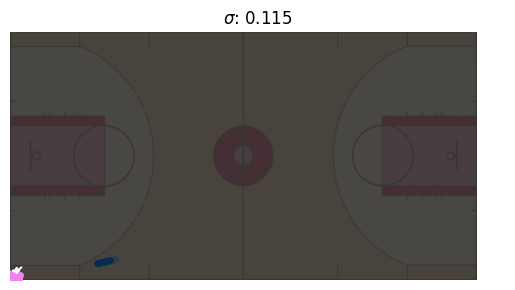

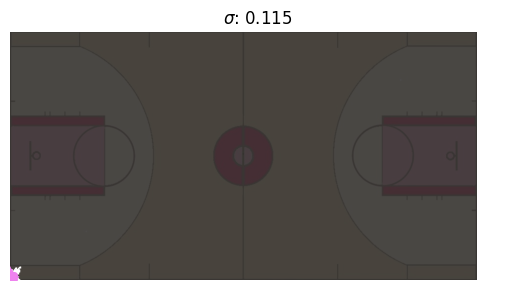

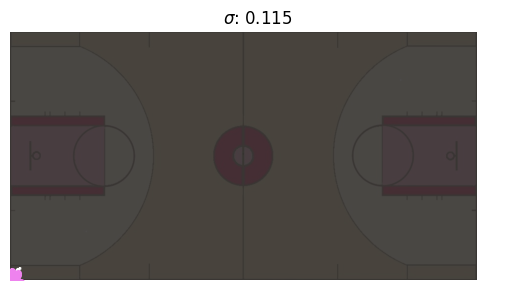

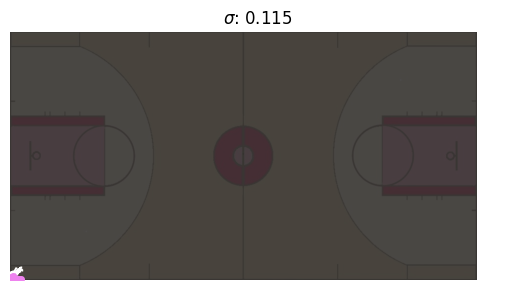

In [15]:
idx = [[0, 10], [2, 10], [3, 10], [4, 10]]

for i in idx:
    scene = i[0]
    actor_num = i[1]

    plt.clf()

    ax = plt.axes(xlim=(Constant.X_MIN,
                        Constant.X_MAX),
                ylim=(Constant.Y_MIN,
                        Constant.Y_MAX))
    ax.axis('off')
    fig = plt.gcf()
    ax.grid(False)  # Remove grid


    idx = scene*100 + actor_num

    colorteam1 = 'dodgerblue'
    colorteam2 = 'dodgerblue'
    colorball = 'dodgerblue'
    colorteam1_pre = 'skyblue'
    colorteam2_pre = 'skyblue'
    colorball_pre = 'skyblue'




    traj_pred = prediction[idx]
    traj_mean = mean[idx]
    # background players
    for actor_num_other in range(100):
        zorder = 5
        if actor_num_other==actor_num:
            zorder = 105
        traj_curr_ = traj[scene, actor_num_other].numpy()
        if actor_num_other < 5:
            color = colorteam1
            color_pre = colorteam1_pre
        elif actor_num_other < 10:
            color = colorteam2
            color_pre = colorteam2_pre
        else:
            color_pre = colorball_pre
            color = colorball
        for i in range(30):
            points = [(traj_curr_[i,0],traj_curr_[i,1])]
            (x, y) = zip(*points)
            if i < 10:
                plt.scatter(x, y, color=color_pre,s=15,alpha=1, zorder=zorder)
            else:
                if actor_num_other==actor_num and i==29:
                    plt.scatter(x, y, color=color,s=60, marker='*', alpha=1, zorder=zorder)
                
                plt.scatter(x, y, color=color, s=15,alpha=1, zorder=zorder)

        for i in range(29):
            points = [(traj_curr_[i,0],traj_curr_[i,1]),(traj_curr_[i+1,0],traj_curr_[i+1,1])]
            (x, y) = zip(*points)
            if i < 10:
                plt.plot(x, y, color=color_pre,alpha=0.5,linewidth=2, zorder=zorder-1)
            else:
                plt.plot(x, y, color=color,alpha=1,linewidth=2, zorder=zorder-1)


    for i in range(20):
        plt.plot(traj_pred[i, :19, 0], traj_pred[i, :19, 1], 
                 linestyle='-', markersize=2, marker="|", alpha=1,
                 color='white',linewidth=1, zorder=101)
        plt.plot(traj_pred[i,18:, 0], traj_pred[i, 18:, 1], 
                 linestyle='-', markersize=0, marker="o", alpha=1,
                 color='white',linewidth=1, zorder=101)


    plt.scatter(traj_pred[:, -1, 0], traj_pred[:, -1, 1], 
                marker='*', 
                color='white',s=60, alpha=1, zorder=120)



    plt.plot(traj_mean[:19, 0], traj_mean[:19, 1],
             linestyle='-', markersize=4, marker="o", alpha=1,
             color='violet',linewidth=3, zorder=130)
    plt.plot(traj_mean[18:, 0], traj_mean[18:, 1],
             linestyle='-', markersize=0, marker="o", alpha=1,
             color='violet',linewidth=3, zorder=130) 
    plt.scatter(traj_mean[-1, 0], traj_mean[ -1, 1], 
                marker='*', 
                color='violet',s=60, alpha=1, zorder=130)
    
    

    plt.title('$\sigma$: {:.3f}'.format(sigma[idx, 0]))
    plt.imshow(court, zorder=0, extent=[Constant.X_MIN, Constant.X_MAX - Constant.DIFF,
                                        Constant.Y_MAX, Constant.Y_MIN],alpha=0.5)
    plt.imshow(mask, zorder=90, extent=[Constant.X_MIN, Constant.X_MAX - Constant.DIFF,
                                        Constant.Y_MAX, Constant.Y_MIN],alpha=0.7)
    # plt.savefig('fig3/scene_{}_agent_{}.jpg'.format(scene, actor_num), bbox_inches='tight', dpi=300)
#         print(scene)
    plt.show()
    plt.close()

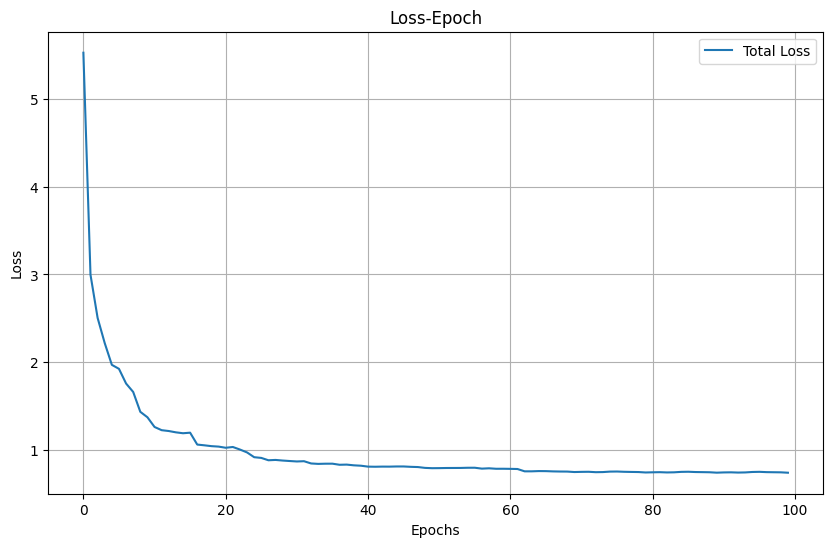

In [20]:
total_loss_values = [5.523761, 2.996329, 2.505044, 2.218024, 1.970895, 1.925466, 1.758196, 1.662077, 1.436094, 1.374129, 1.263628, 1.227079, 1.217516, 1.202532, 1.192296, 1.198594, 1.063338, 1.054910, 1.045353, 1.040217, 1.026902, 1.035798, 1.006807, 0.973808, 0.919578, 0.911464, 0.884679, 0.888433, 0.881446, 0.876061, 0.871040, 0.873954, 0.848286, 0.843423, 0.845525, 0.845768, 0.833352, 0.835331, 0.827090, 0.822692, 0.812214, 0.810994, 0.812485, 0.812181, 0.814020, 0.814069, 0.809975, 0.807434, 0.797929, 0.794492, 0.795177, 0.796618, 0.796919, 0.797275, 0.799353, 0.799595, 0.789462, 0.793233, 0.787864, 0.788053, 0.786906, 0.785187, 0.758782, 0.758771, 0.761588, 0.760925, 0.757999, 0.756488, 0.755903, 0.750682, 0.752684, 0.753609, 0.749001, 0.750274, 0.755601, 0.756546, 0.753462, 0.751831, 0.750558, 0.745707, 0.747705, 0.749042, 0.746057, 0.747535, 0.752560, 0.753934, 0.750695, 0.749491, 0.748099, 0.743464, 0.746281, 0.747376, 0.744658, 0.746233, 0.751301, 0.753015, 0.749589, 0.748383, 0.747332, 0.742888]











epochs = list(range(100))  # Assuming 90 epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, total_loss_values, label='Total Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss-Epoch')
plt.legend()
plt.grid(True)
plt.show()